# Proyek Analisis Data: Bike Sharing
- Nama: Nur Azizah Munir
- Email: nurazizahmunir2@gmail.com
- Id Dicoding: nrazizahmr12

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan bike sharing dalam setiap tahun, bulan, dan jam?
- Bagaimana hari libur memengaruhi penggunaan bike sharing?
- Bagaimana hari kerja memengaruhi penggunaan bike sharing?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Library numpy digunakan untuk komputasi numerik

Library pandas digunakan untuk memanipulasi dan menganalisis data

Library matplotlib digunakan untuk membuat sebuah figure

Library seaborn digunakan untuk visualisasi data yang atraktif dan informatif.

## Data Wrangling

### Gathering Data

**tabel day**

In [2]:
day = pd.read_csv('https://raw.githubusercontent.com/nrazizahmr/BDAP_Dicoding/main/Submission/data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membaca dataset csv file dari Github Repository menggunakan library pandas

**tabel hour**

In [12]:
hour = pd.read_csv("https://raw.githubusercontent.com/nrazizahmr/bdap_dicoding/main/Submission/data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Membaca dataset csv file dari Github Repository menggunakan library pandas

### Assessing Data

 **Tabel day**

**Cek tipe data**

In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



Berdasarkan hasil pengamatan pada tabel dayterdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

**Cek missing value**

In [14]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan pada tabel day tidak terdapat missing value

**Cek duplikasi**

In [15]:
print("Day Duplicate:", day.duplicated().sum())

Day Duplicate: 0


Berdasarkan hasil pengecekan pada tabel day tidak terdapat duplikasi data

**Cek Parameter**

In [16]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Berdasarkan hasil pengamatan pada tabel day tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

 **Tabel hour**

**Cek tipe data**

In [17]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil pengamatan pada tabel hour terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

**Cek missing value**

In [18]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil pengecekan pada tabel hour tidak terdapat missing value



**Cek duplikasi**

In [19]:
print("Hour Duplicate:", hour.duplicated().sum())

Hour Duplicate: 0


Berdasarkan hasil pengecekan pada tabel hour tidak terdapat duplikasi data

**Cek Parameter**

In [20]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil pengamatan pada tabel hour tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

### Cleaning Data

**tabel day**

**Memperbaiki tipe data**

In [21]:
day["dteday"] = pd.to_datetime(day["dteday"])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki tipe data pada tabel day kolom dteday menjadi datetime menggunakan pandas

 **Tabel hour**

**Memperbaiki tipe data**

In [22]:
hour["dteday"] = pd.to_datetime(hour["dteday"])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Memperbaiki tipe data pada tabel hour_df kolom dteday menjadi datetime menggunakan pandas

## Exploratory Data Analysis (EDA)

### Explore Day

In [23]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
543,544,2012-06-27,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258,7335
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
69,70,2011-03-11,1,0,3,0,5,1,2,0.316522,0.305000,0.649565,0.232970,247,1730,1977
617,618,2012-09-09,3,1,9,0,0,0,1,0.610000,0.578925,0.547500,0.224496,2570,5657,8227


In [24]:
day.loc[day["yr"] == 0, "yr"] = "2011"
day.loc[day["yr"] == 1, "yr"] = "2012"

day.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [25]:
day.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [26]:
day.loc[day["holiday"] == 0, "holiday"] = "Holiday"
day.loc[day["holiday"] == 1, "holiday"] = "Not a Holiday"

day.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [27]:
day.loc[day["workingday"] == 0, "workingday"] = "Holiday"
day.loc[day["workingday"] == 1, "workingday"] = "Working Day"

day.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

### Explore Hour

In [28]:
hour.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan bike sharing dalam setiap tahun, bulan, dan jam?

Tahun

In [29]:
year_day = day.groupby(by="yr").instant.nunique().reset_index()
year_day.rename(columns={
    "instant": "sum"
}, inplace=True)
year_day

,yr,sum
0,2011,365
1,2012,366


Berdasarkan hasil pengamatan pada tabel byyr_df pada kolom yr dan sum bahwa tren pengguna bike sharing paling banyak pada tahun 2012. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada tahun 2012

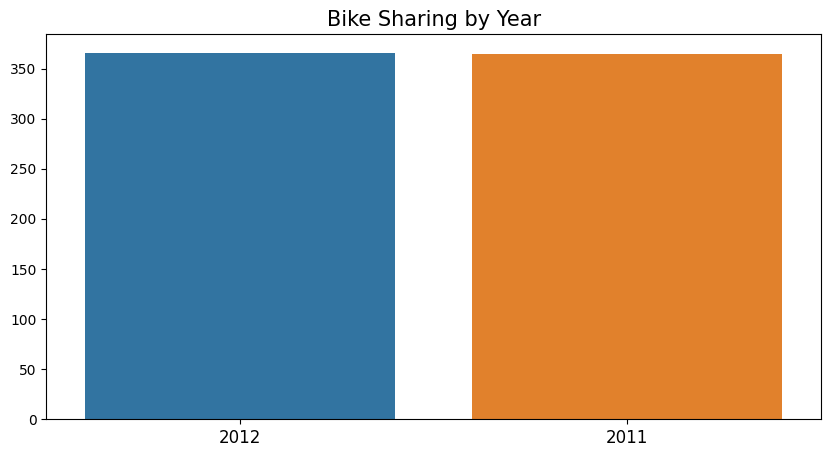

In [30]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="yr",
    data=year_day.sort_values(by="yr", ascending=False),
)
plt.title("Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Pada diagram tersebut tidak terlalu terlihat perbedaannya karena angka perbedaannya sangat tipis

Bulan

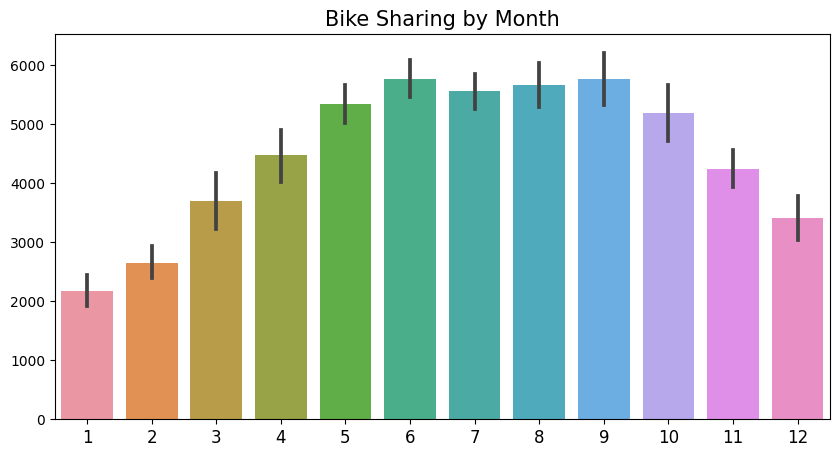

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="mnth",
    data=day.sort_values(by="mnth", ascending=False),
)
plt.title("Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Berdasarkan hasil pengamatan pada tabel day pada kolom mnth dan cnt bahwa tren pengguna bike sharing paling banyak pada bulan 6

Jam

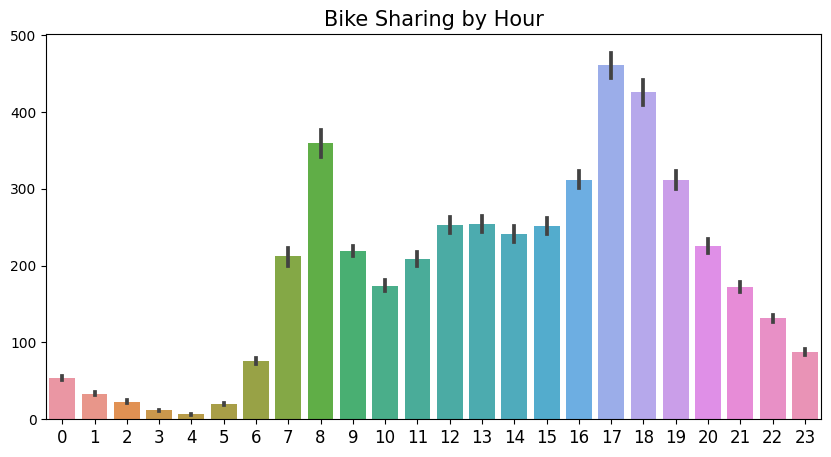

In [32]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour.sort_values(by="hr", ascending=False),
)
plt.title("Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Berdasarkan hasil pengamatan pada tabel hour pada kolom hour dan cnt bahwa tren pengguna bike sharing paling banyak pada jam 17

### Pertanyaan 2: Bagaimana hari libur memengaruhi penggunaan bike sharing?

In [33]:
holidyday = day.groupby(by="holiday").instant.nunique().reset_index()
holidyday.rename(columns={
    "instant": "sum"
}, inplace=True)
holidyday

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


Berdasarkan hasil pengamatan pada tabel byholiday pada kolom holiday dan sum bahwa banyak pengguna bike sharing pada hari libur. Dapat disimpulkan bahwa hari libur berpengaruh terhadap pengguna bike sharing.

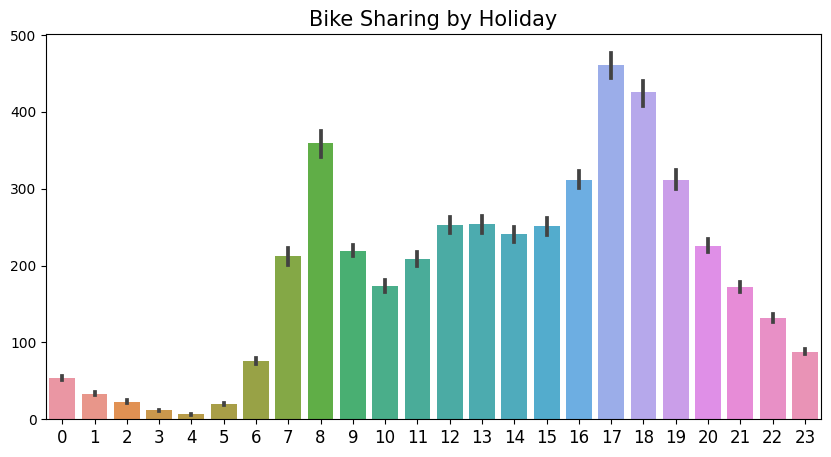

In [34]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour.sort_values(by="hr", ascending=False),
)
plt.title("Bike Sharing by Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Berdasarkan hasil pengamatan pada tabel day_df pada kolom mnth dan cnt bahwa tren pengguna bike sharing paling banyak pada bulan 6

### Pertanyaan 3: Bagaimana hari kerja memengaruhi penggunaan bike sharing?

In [35]:
workingday = day.groupby(by="workingday").instant.nunique().reset_index()
workingday.rename(columns={
    "instant": "sum"
}, inplace=True)
workingday

,workingday,sum
0,Holiday,231
1,Working Day,500


Berdasarkan hasil pengamatan pada tabel byworking_df pada kolom workingday dan sum bahwa banyak pengguna bike sharing pada hari kerja. Dapat disimpulkan bahwa hari kerja berpengaruh terhadap pengguna bike sharing.

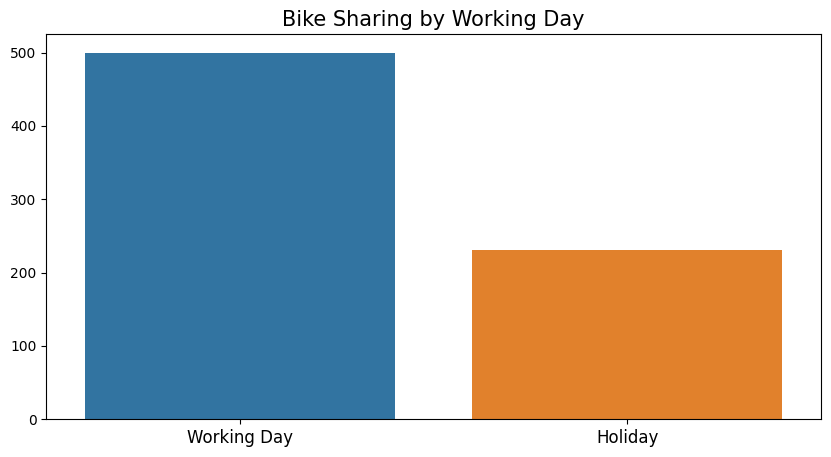

In [36]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=workingday.sort_values(by="workingday", ascending=False),
)
plt.title("Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [ ]:
day.to_csv("day_cleaning.csv", index=False)

## Conclusion

- Berdasarkan hasil pengamatan pada tabel byyr_df pada kolom yr dan sum bahwa tren pengguna bike sharing paling banyak pada tahun 2012. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada tahun 2012.
Berdasarkan hasil pengamatan pada tabel day pada kolom mnth dan cnt bahwa tren pengguna bike sharing paling banyak pada bulan 6. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada bulan 6.
Berdasarkan hasil pengamatan pada tabel hour pada kolom hour dan cnt bahwa tren pengguna bike sharing paling banyak pada jam 17. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada jam 17.
- Berdasarkan hasil pengamatan pada tabel holiday pada kolom holiday dan sum bahwa banyak pengguna bike sharing pada hari libur. Dapat disimpulkan bahwa hari libur berpengaruh terhadap pengguna bike sharing.
- Berdasarkan hasil pengamatan pada tabel byworking_df pada kolom workingday dan sum bahwa banyak pengguna bike sharing pada hari kerja. Dapat disimpulkan bahwa hari kerja berpengaruh terhadap pengguna bike sharing.